## Import Some Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [34]:
df = pd.read_csv('Depression and  Happiness Factor Analysis_1604050.csv') 
df.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,4th year,Normal,50,Male,25,Home,In a relationship,Yes,3,Normal,No,No,Yes,Not applicable,Yes,No,Yes,No,No,6
1,4th year,Good,80,Male,25,Home,In a relationship,Yes,3,Good,No,No,Yes,No one,Yes,No,Neutral,No,No,6
2,4th year,Very good,90,Male,25,Home,In a relationship,Yes,3,Normal,No,No,Yes,No one,Yes,Maybe,Yes,No,No,7
3,4th year,Normal,70,Male,25,Home,In a relationship,Yes,3,Normal,No,No,Yes,No one,Yes,Maybe,Neutral,No,No,8
4,1st year,Normal,50,Male,22,Home,In a relationship,Yes,3,Normal,Yes,No,Yes,No one,No,No,Yes,No,No,6


In [35]:
# Renaming the columns
df.columns = ['Education', 'Emotion_category','Scale','Gender','Age','Location','Relationship_status','Financial_state',' cope_with_environment','Understanding_with_family',
              'Feeling_in_study_work','Academic_result','Living_place','Who_supports?','social_media_activity','Inferiority_complex?','Todays_meal','Health_issues',
            'Recreational_activity','Sleeping_last_night']

df.head()

,Education,Emotion_category,Scale,Gender,Age,Location,Relationship_status,Financial_state,cope_with_environment,Understanding_with_family,Feeling_in_study_work,Academic_result,Living_place,Who_supports?,social_media_activity,Inferiority_complex?,Todays_meal,Health_issues,Recreational_activity,Sleeping_last_night
0,4th year,Normal,50,Male,25,Home,In a relationship,Yes,3,Normal,No,No,Yes,Not applicable,Yes,No,Yes,No,No,6
1,4th year,Good,80,Male,25,Home,In a relationship,Yes,3,Good,No,No,Yes,No one,Yes,No,Neutral,No,No,6
2,4th year,Very good,90,Male,25,Home,In a relationship,Yes,3,Normal,No,No,Yes,No one,Yes,Maybe,Yes,No,No,7
3,4th year,Normal,70,Male,25,Home,In a relationship,Yes,3,Normal,No,No,Yes,No one,Yes,Maybe,Neutral,No,No,8
4,1st year,Normal,50,Male,22,Home,In a relationship,Yes,3,Normal,Yes,No,Yes,No one,No,No,Yes,No,No,6


In [36]:
# Target Counts
df.groupby('Emotion_category').size()

Emotion_category
Bad           46
Good         205
Normal       156
Very bad      45
Very good    198
dtype: int64

In [37]:
# One Hot Encode the categorical data
categorical_cols =['Education', 'Gender', 'Location', 'Relationship_status','Financial_state','Understanding_with_family',
                     'Feeling_in_study_work','Academic_result','Living_place','Who_supports?','social_media_activity','Inferiority_complex?',
                     'Todays_meal','Health_issues','Recreational_activity'] 

df = pd.get_dummies(df, columns =categorical_cols, drop_first=True)

In [38]:
df.head(3)

,Emotion_category,Scale,Age,cope_with_environment,Sleeping_last_night,Education_2nd year,Education_3rd year,Education_4th year,Education_Not applicable,Location_Department,...,Who_supports?_No one,Who_supports?_Not applicable,social_media_activity_Yes,Inferiority_complex?_No,Inferiority_complex?_Not applicable,Inferiority_complex?_Yes,Todays_meal_No,Todays_meal_Yes,Health_issues_Yes,Recreational_activity_Yes
0,Normal,50,25,3,6,0,0,1,0,0,...,0,1,1,1,0,0,0,1,0,0
1,Good,80,25,3,6,0,0,1,0,0,...,1,0,1,1,0,0,0,0,0,0
2,Very good,90,25,3,7,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0


<AxesSubplot:>

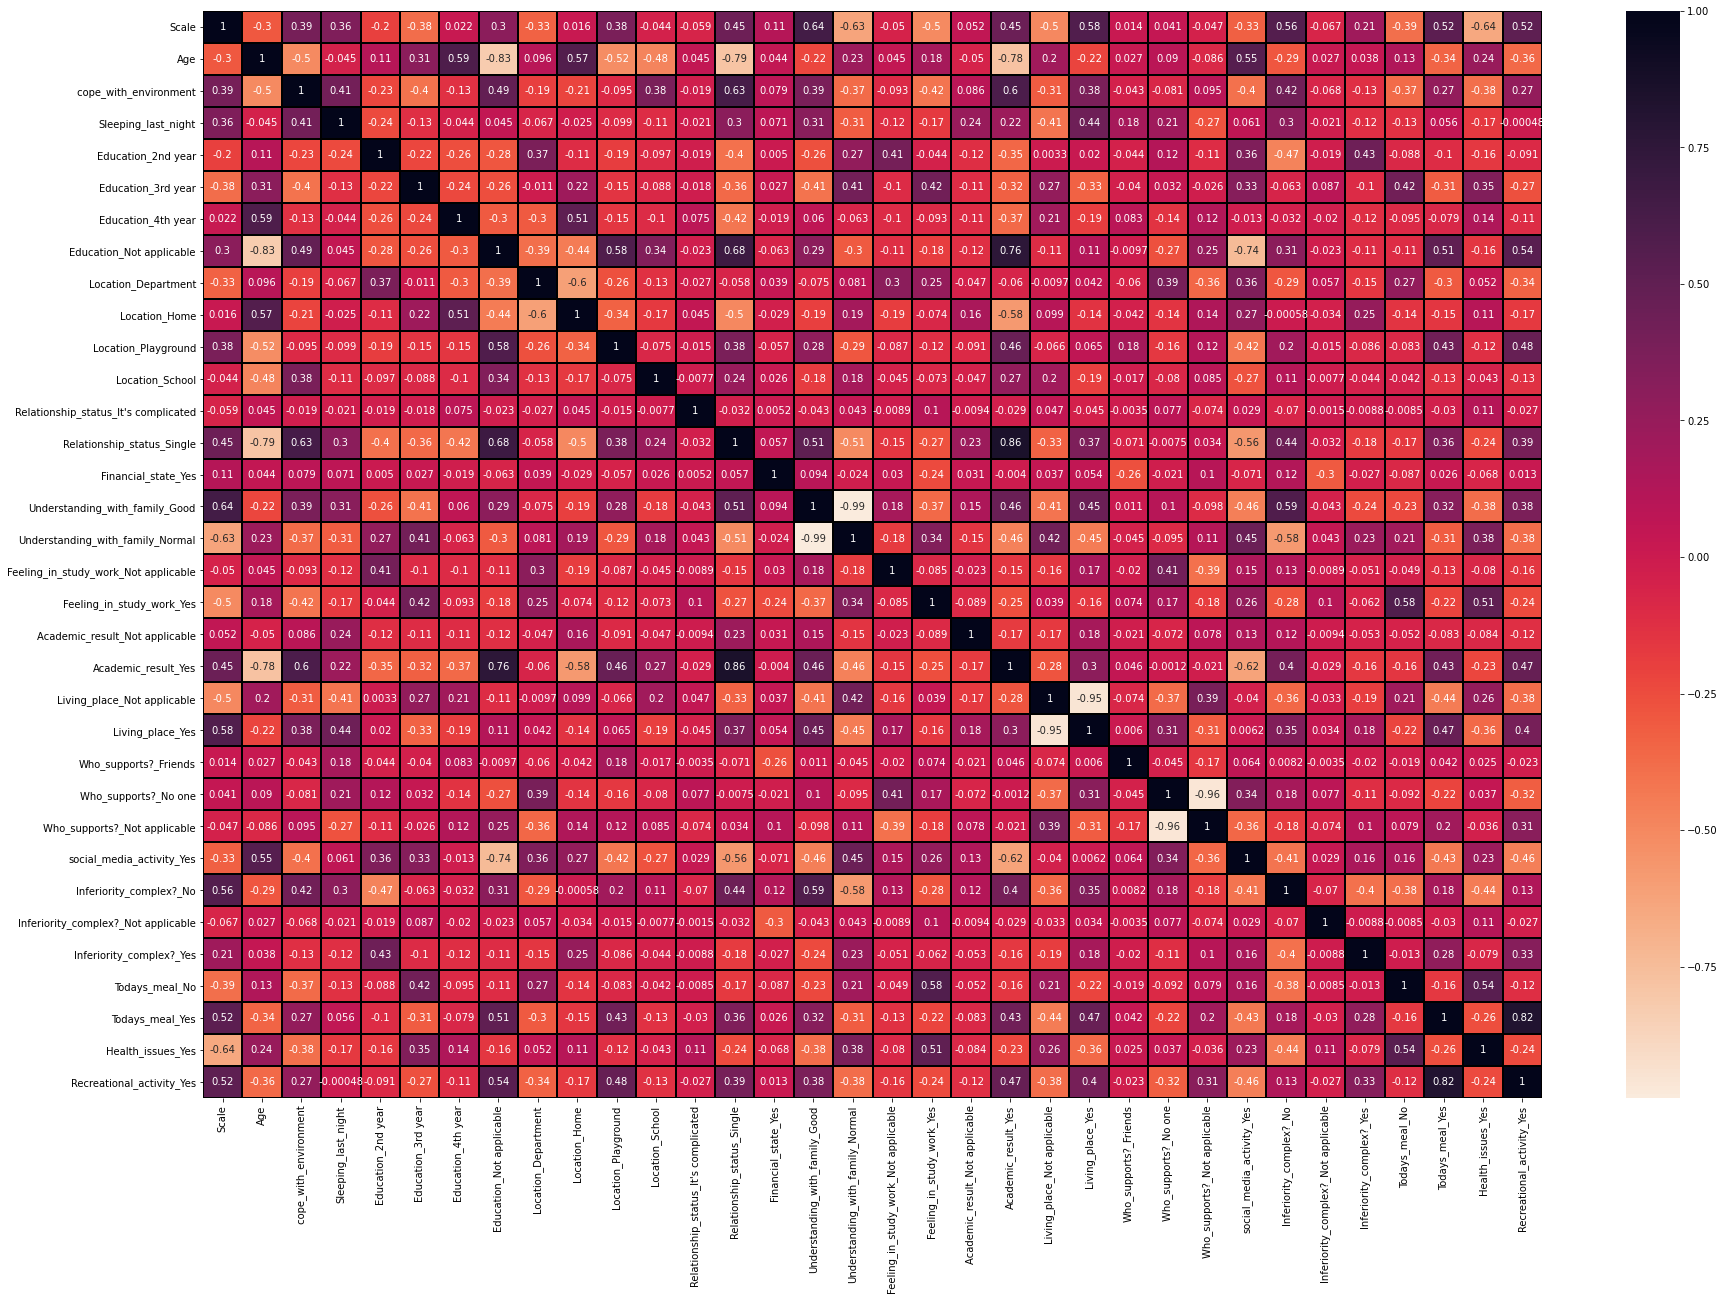

In [39]:
# See the correlation between features
import seaborn as sns
plt.figure(figsize=(30,20))

corrmat = df.corr()
sns.heatmap(corrmat,cmap='rocket_r',linecolor='black',linewidths=1,annot = True)


### Decision Tree Classifier From Scratch

In [40]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [41]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        
        # initialize the root
        self.root = None
        
        # Terminating conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="gini"):
        ''' function to compute information gain'''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict on new dataset'''
        
        predictions = [self.make_prediction(x, self.root) for x in X]
        return predictions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point'''
        
        if tree.value!=None: return tree.value
        feature_val = x [tree.feature_index]
        if feature_val<= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

## Train-Test split

In [42]:
X=df.iloc[:,1:].values
Y= df.iloc[:,0].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [43]:
print(X.shape)
print(Y.shape)

(650, 34)
(650, 1)


In [44]:
X_test

array([[70, 25,  3, ...,  0,  0,  0],
       [90, 22,  4, ...,  0,  0,  0],
       [70, 21,  5, ...,  1,  0,  1],
       ...,
       [80, 22,  3, ...,  0,  0,  0],
       [22, 23,  3, ...,  0,  0,  0],
       [55, 17,  5, ...,  0,  0,  0]], dtype=int64)

## Fit Decision Tree Classifier

In [45]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)

## Test the Classifier

In [50]:
Y_pred = classifier.predict(X_test) 
Y_pred

['Good',
 'Very good',
 'Good',
 'Normal',
 'Very good',
 'Good',
 'Very bad',
 'Very good',
 'Normal',
 'Normal',
 'Bad',
 'Normal',
 'Very bad',
 'Good',
 'Normal',
 'Very bad',
 'Very good',
 'Very good',
 'Very good',
 'Bad',
 'Very good',
 'Good',
 'Good',
 'Normal',
 'Very good',
 'Normal',
 'Very bad',
 'Normal',
 'Very good',
 'Very good',
 'Very good',
 'Good',
 'Normal',
 'Good',
 'Good',
 'Very good',
 'Bad',
 'Normal',
 'Very good',
 'Normal',
 'Good',
 'Very good',
 'Good',
 'Very bad',
 'Very good',
 'Good',
 'Very good',
 'Normal',
 'Very good',
 'Bad',
 'Very good',
 'Very good',
 'Very good',
 'Very good',
 'Good',
 'Normal',
 'Good',
 'Good',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Very good',
 'Good',
 'Good',
 'Good',
 'Very good',
 'Good',
 'Normal',
 'Bad',
 'Very good',
 'Good',
 'Very good',
 'Bad',
 'Good',
 'Good',
 'Very good',
 'Normal',
 'Very good',
 'Good',
 'Very good',
 'Good',
 'Normal',
 'Very good',
 'Very good',
 'Normal',
 'Very good',
 'Very

In [51]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy Score = {}".format(accuracy_score(Y_test, Y_pred)))
print("Classification Report:\n {} ".format(classification_report(Y_test, Y_pred)))

Accuracy Score = 0.9692307692307692
Classification Report:
               precision    recall  f1-score   support

         Bad       0.89      0.73      0.80        11
        Good       1.00      1.00      1.00        38
      Normal       0.95      1.00      0.97        36
    Very bad       1.00      0.86      0.92         7
   Very good       0.97      1.00      0.99        38

    accuracy                           0.97       130
   macro avg       0.96      0.92      0.94       130
weighted avg       0.97      0.97      0.97       130
 


In [52]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, Y_pred) 

Confusion matrix, without normalization


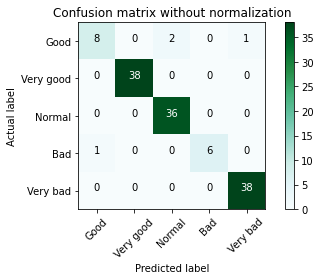

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuGn):   
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Good', 'Very good', 'Normal','Bad','Very bad'],
                      title='Confusion matrix without normalization')
